In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy import sparse
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
root_dir = "/content/drive/MyDrive/AudioWAV/"

In [ ]:
audiofiles=os.listdir(root_dir)
print(len(audiofiles))
print(audiofiles[0])

7442
1079_IWW_SAD_XX.wav


In [ ]:
def extract_features(file_name):

    result=np.array([])

    with soundfile.SoundFile(root_dir+file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate

        stft=np.abs(librosa.stft(X))
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)

        result=np.hstack((result, mfccs))

        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

        result=np.hstack((result, chroma))
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

        result=np.hstack((result, mel))
    
    # print(result.shape) shape = (180,)
    return result


In [ ]:
study_features=extract_features("1001_DFA_ANG_XX.wav")
print(study_features.shape)

(180,)


In [ ]:
SENTIMENTS = ['ANG','DIS','FEA','HAP','NEU','SAD']

In [ ]:
def load_data():

    features_array=[]
    class_ids=[]
    counter=0
    for file in audiofiles:

      print(f"Processing file: {counter+1}")
      filename=file[:-4]
      sentiment=filename.split("_")[2]
      class_id=SENTIMENTS.index(sentiment)
      features=extract_features(file)

      features_array.append(features)
      class_ids.append(class_id)

      counter+=1

    return np.array(features_array), np.array(class_ids)
    # return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
x, ycat = load_data()

Processing file: 1
Processing file: 2
Processing file: 3
Processing file: 4
Processing file: 5
Processing file: 6
Processing file: 7
Processing file: 8
Processing file: 9
Processing file: 10
Processing file: 11
Processing file: 12
Processing file: 13
Processing file: 14
Processing file: 15
Processing file: 16
Processing file: 17
Processing file: 18
Processing file: 19
Processing file: 20
Processing file: 21
Processing file: 22
Processing file: 23
Processing file: 24
Processing file: 25
Processing file: 26
Processing file: 27
Processing file: 28
Processing file: 29
Processing file: 30
Processing file: 31
Processing file: 32
Processing file: 33
Processing file: 34
Processing file: 35
Processing file: 36
Processing file: 37
Processing file: 38
Processing file: 39
Processing file: 40
Processing file: 41
Processing file: 42
Processing file: 43
Processing file: 44
Processing file: 45
Processing file: 46
Processing file: 47
Processing file: 48
Processing file: 49
Processing file: 50
Processin

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


Streaming output truncated to the last 5000 lines.
Processing file: 2443
Processing file: 2444
Processing file: 2445
Processing file: 2446
Processing file: 2447
Processing file: 2448
Processing file: 2449
Processing file: 2450
Processing file: 2451
Processing file: 2452
Processing file: 2453
Processing file: 2454
Processing file: 2455
Processing file: 2456
Processing file: 2457
Processing file: 2458
Processing file: 2459
Processing file: 2460
Processing file: 2461
Processing file: 2462
Processing file: 2463
Processing file: 2464
Processing file: 2465
Processing file: 2466
Processing file: 2467
Processing file: 2468
Processing file: 2469
Processing file: 2470
Processing file: 2471
Processing file: 2472
Processing file: 2473
Processing file: 2474
Processing file: 2475
Processing file: 2476
Processing file: 2477
Processing file: 2478
Processing file: 2479
Processing file: 2480
Processing file: 2481
Processing file: 2482
Processing file: 2483
Processing file: 2484
Processing file: 2485
Pro

In [ ]:
print(x.shape)
print(ycat.shape)

(7442, 180)
(7442,)


In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
print(x[0])

[7.43e-01 7.74e-01 6.31e-01 4.77e-01 6.80e-01 6.76e-01 6.25e-01 7.35e-01
 7.20e-01 4.93e-01 5.28e-01 4.31e-01 4.81e-01 3.67e-01 3.89e-01 4.37e-01
 3.81e-01 4.45e-01 2.62e-01 2.37e-01 3.23e-01 4.27e-01 3.46e-01 4.24e-01
 3.06e-01 3.66e-01 4.43e-01 6.95e-01 8.32e-01 6.44e-01 4.40e-01 4.18e-01
 5.10e-01 4.82e-01 4.43e-01 2.35e-01 2.55e-01 4.27e-01 5.13e-01 3.89e-01
 5.77e-01 6.53e-01 6.66e-01 5.84e-01 6.73e-01 7.41e-01 5.60e-01 6.53e-01
 7.33e-01 8.89e-01 8.72e-01 6.40e-01 1.27e-01 6.36e-02 5.97e-02 4.99e-02
 2.63e-02 3.64e-03 3.36e-03 3.38e-03 1.13e-02 1.22e-02 7.75e-04 1.07e-04
 5.67e-05 5.88e-05 1.97e-05 9.96e-05 1.82e-04 3.58e-04 1.08e-03 8.61e-04
 2.09e-04 8.04e-05 6.51e-05 1.21e-04 4.08e-05 9.54e-05 4.13e-04 2.67e-04
 1.61e-03 5.65e-04 1.90e-05 1.60e-04 1.28e-04 1.17e-04 8.94e-05 1.63e-04
 2.46e-04 1.35e-04 5.47e-04 3.19e-04 4.35e-05 1.14e-05 6.43e-06 1.08e-05
 8.94e-05 1.65e-04 6.11e-04 5.70e-04 3.22e-04 5.05e-05 3.42e-06 1.33e-05
 7.54e-05 1.57e-04 1.03e-04 5.30e-05 6.12e-05 3.59e

In [ ]:
fullarr=np.c_[ x, ycat ]

In [ ]:
fullarr.shape

(7442, 181)

In [ ]:
fullarr

array([[7.43e-01, 7.74e-01, 6.31e-01, ..., 1.59e-04, 7.87e-05, 5.00e+00],
       [7.73e-01, 6.95e-01, 5.84e-01, ..., 4.60e-04, 5.43e-04, 1.00e+00],
       [8.27e-01, 4.21e-01, 6.22e-01, ..., 1.44e-02, 1.07e-02, 0.00e+00],
       ...,
       [7.52e-01, 7.49e-01, 3.94e-01, ..., 6.32e-04, 2.88e-04, 4.00e+00],
       [7.18e-01, 7.41e-01, 7.77e-01, ..., 6.84e-05, 2.86e-05, 2.00e+00],
       [8.46e-01, 5.75e-01, 2.69e-01, ..., 1.67e-02, 8.73e-03, 3.00e+00]])

In [ ]:
np.save('audio_np_array.npy', fullarr)

In [ ]:
from google.colab import files
files.download("audio_np_array.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.utils import np_utils

In [ ]:
y = np_utils.to_categorical(ycat)

In [ ]:
y.shape

(7442, 6)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.1, random_state=10)

In [ ]:
dim=x_train.shape[1]
print(f'Features extracted: {dim}')

Features extracted: 180


In [ ]:
num_classes=len(SENTIMENTS)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
mlpclassifier=Sequential()
mlpclassifier.add(Dense(120, input_dim=dim, activation="relu", name="mlp_dense_1"))
mlpclassifier.add(Dense(60, activation="relu", name="mlp_dense_2"))
mlpclassifier.add(Dense(num_classes, activation='softmax', name="mlp_dense_3"))

In [ ]:
mlpclassifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlpclassifier.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mlp_dense_1 (Dense)         (None, 120)               21720     
                                                                 
 mlp_dense_2 (Dense)         (None, 60)                7260      
                                                                 
 mlp_dense_3 (Dense)         (None, 6)                 366       
                                                                 
Total params: 29,346
Trainable params: 29,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=5, min_lr=1e-9) 

In [ ]:
mlpclassifier.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.15, callbacks=[lrr], verbose=1)

Epoch 1/100
356/356 [==============================] - 2s 3ms/step - loss: 1.6456 - accuracy: 0.2837 - val_loss: 1.6156 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 2/100
356/356 [==============================] - 1s 3ms/step - loss: 1.5166 - accuracy: 0.3654 - val_loss: 1.5358 - val_accuracy: 0.3433 - lr: 0.0010
Epoch 3/100
356/356 [==============================] - 1s 3ms/step - loss: 1.4721 - accuracy: 0.3869 - val_loss: 1.5323 - val_accuracy: 0.3463 - lr: 0.0010
Epoch 4/100
356/356 [==============================] - 1s 3ms/step - loss: 1.4398 - accuracy: 0.3965 - val_loss: 1.4476 - val_accuracy: 0.3970 - lr: 0.0010
Epoch 5/100
356/356 [==============================] - 1s 3ms/step - loss: 1.4168 - accuracy: 0.4180 - val_loss: 1.4475 - val_accuracy: 0.3900 - lr: 0.0010
Epoch 6/100
356/356 [==============================] - 1s 3ms/step - loss: 1.4002 - accuracy: 0.4185 - val_loss: 1.4260 - val_accuracy: 0.3940 - lr: 0.0010
Epoch 7/100
356/356 [==============================] - 1s 3ms/st

In [ ]:
mlpclassifier.save('mlpclassifier_final.h5')

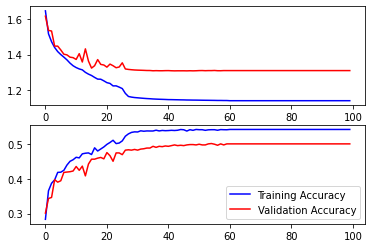

In [ ]:
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(mlpclassifier.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(mlpclassifier.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(mlpclassifier.history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(mlpclassifier.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
results = mlpclassifier.evaluate(x_test, y_test, batch_size=32)
print("test loss, test accuracy:", results)

24/24 [==============================] - 0s 2ms/step - loss: 1.2516 - accuracy: 0.5074
test loss, test accuracy: [1.2516331672668457, 0.5073825716972351]


In [ ]:
predictions = mlpclassifier.predict(x_test)
print("predictions shape:", predictions.shape)

predictions shape: (745, 6)


In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
y_true=np.argmax(y_test,axis=1)
y_pred=np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_mtx=confusion_matrix(y_true, y_pred)

class_names= ['ANGER','DISGUST','FEAR','HAPPY','NEUTRAL','SAD']

Confusion matrix, without normalization


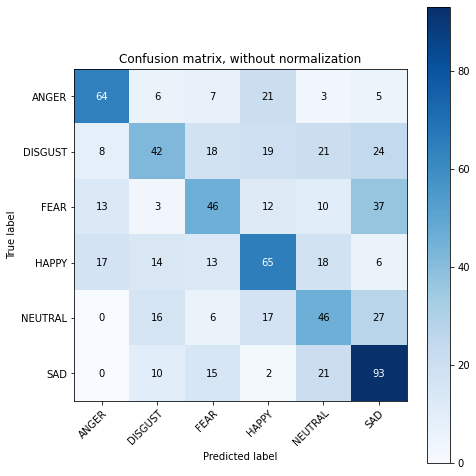

In [ ]:
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


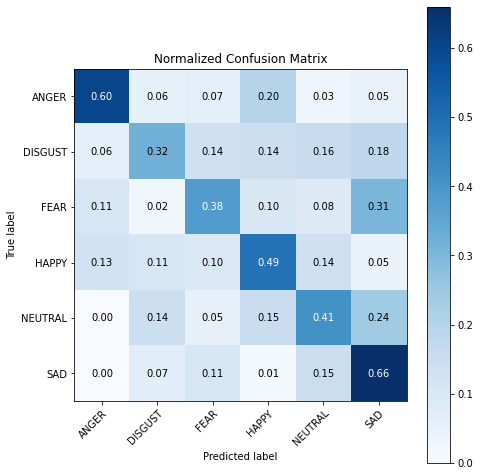

In [ ]:
# Plotting Normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, normalize=True, title = 'Normalized Confusion Matrix')